#  Chapter 1 DataCleaning and Exploratory Data Analysis

This first session deals with data cleaning, EDA and builing a simplistic model that can be used for predicting the sale price of houses in Ames, IOWA. Here we try to understand the dataset and get familiar with the methodology for developing an efficient model.

The next session contains a report that contains  the detailed analysis, interpretation, and information for the models. We will do a cross-validation and data splitting where the original data set is split into two data sets: the training set and the validation set. 

W

## The Data
There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. **PID** refers to the land parcel ID, which can merged on the *MapRefNo* column of the **Ames Accessor Data** (`Ames_Real_Estate_Data.csv`) to find the property address. Using a free service, such as **geopy**, we can find the long-lat coordinates of the houses.

The columns of the data are mostly attributes associated with the land and the houses. There are size related attributes, quality and condition attributes, house attachment attributes, etc.

To establish a foundation for your team's data analytics, we offer some insights on the house sizes vs. prices.

In [1]:
# Import the datasets and the libraries
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as stats
realEstate = pd.read_csv("Ames_Real_Estate_Data.csv")
realEstate = realEstate[['MapRefNo','Prop_Addr','MA_Zip1']]
geocode_data =pd.read_csv("geocode_data.csv")

#Linear Models
from sklearn.linear_model import Lasso, ElasticNet


#Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge


#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#Support Vector Machines
from sklearn import svm

#Linear Regression
from sklearn import linear_model

#Make Pipeline
from sklearn.pipeline import make_pipeline

#Robust Scaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score


housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing = housing[housing.GrLivArea<3700]
housing = housing[housing.SalePrice>13000]
from scipy import stats
housing

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_50075/1825614854.py:14: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  realEstate = pd.read_csv("Ames_Real_Estate_Data.csv")


,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,121000,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
760,139600,905402060,1733,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
761,145000,909275030,2002,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
762,217500,907192040,1842,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [2]:
housing.isna().sum()

SalePrice        0
PID              0
GrLivArea        0
MSSubClass       0
MSZoning         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 81, dtype: int64

In [3]:
housing.PID.unique().shape

(2575,)

In [4]:
geocode_data.head()

,Unnamed: 0,PID,lat,long,dist,income,gcode
0,1971,535180070,42.042894,-93.612641,3.326988,52375.0,"210, 21st Street, Broadmoor, Ames, Story Count..."
1,1357,908102040,42.020564,-93.678868,2.760245,33311.0,"234, South Dakota Avenue, Ames, Story County, ..."
2,357,906380170,42.024622,-93.691352,3.713174,60833.0,"5327, Durant Street, Sunset Ridge, Ames, Story..."
3,65,909250060,42.019084,-93.646893,0.847709,20878.0,"2320, Knapp Street, Union Drive, Ames, Story C..."
4,1094,534276180,42.042544,-93.621391,2.721892,61991.0,"2027, Ferndale Avenue, Melrose Park, Ames, Sto..."


In [5]:
housing = pd.merge(housing, geocode_data.iloc[:,1:6], how='left', left_on='PID', right_on ="PID")
housing.isna().sum()

SalePrice          0
PID                0
GrLivArea          0
MSSubClass         0
MSZoning           0
                ... 
SaleCondition      0
lat               99
long              99
dist              99
income           184
Length: 85, dtype: int64

In [6]:
# The OverallQual seems the most important predictor. We want to convert the ordinal predictors to numberical type
qual_related = housing.filter(regex='Qual$|Cond$|HeatingQC$|FireplaceQu').fillna("TA")
qual_related

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,6,6,TA,TA,TA,TA,TA,TA,Gd,TA,TA
1,5,5,Gd,TA,Gd,TA,TA,Gd,TA,TA,TA
2,5,9,Gd,TA,TA,TA,Ex,Gd,TA,TA,Po
3,4,8,Gd,Gd,Fa,TA,Gd,TA,TA,TA,TA
4,8,6,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
2571,6,6,TA,TA,TA,TA,Fa,Fa,Gd,Fa,Po
2572,3,5,TA,TA,TA,TA,Ex,TA,Gd,TA,TA
2573,5,6,TA,TA,TA,TA,TA,TA,TA,TA,TA
2574,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA


In [7]:
#qual_related.GarageCond.value_counts()

In [8]:
# Fill missing values vith TA in the Qualrelated columns
qual_related.fillna("TA", inplace=True)
def Rating(t):
    if t =="Ex": return  7
    elif t == "Gd": return 5
    elif t == "TA": return 3
    elif t == "Fa": return 2.5
    elif t == "Po": return 1
    else: return 0
for ele in qual_related.iloc[:,2:]:
    
    housing[ele]=qual_related[ele].map(Rating)
    qual_related[ele]=housing[ele]
housing

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lat,long,dist,income
0,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,...,NaN,0,3,2010,WD,Normal,42.018564,-93.651619,0.998896,NaN
1,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,0,2,2009,WD,Normal,42.024855,-93.663671,1.433537,21333.0
2,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,...,NaN,0,11,2007,WD,Normal,NaN,NaN,NaN,NaN
3,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,...,NaN,0,5,2009,WD,Normal,42.037391,-93.612207,3.072689,52375.0
4,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,...,NaN,0,11,2009,WD,Normal,42.044554,-93.631818,2.326978,61991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,121000,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,...,NaN,0,5,2009,WD,Normal,42.032102,-93.626373,1.768156,37028.0
2572,139600,905402060,1733,20,RL,NaN,13680,Pave,NaN,IR1,...,NaN,0,6,2009,WD,Normal,42.027669,-93.666138,1.626168,21333.0
2573,145000,909275030,2002,90,RH,82.0,6270,Pave,NaN,Reg,...,NaN,0,8,2007,WD,Normal,42.020129,-93.643832,0.763415,20878.0
2574,217500,907192040,1842,60,RL,NaN,8826,Pave,NaN,Reg,...,NaN,0,7,2007,WD,Normal,42.016802,-93.689748,3.739425,33311.0


In [9]:
housing.isna().sum()

SalePrice          0
PID                0
GrLivArea          0
MSSubClass         0
MSZoning           0
                ... 
SaleCondition      0
lat               99
long              99
dist              99
income           184
Length: 85, dtype: int64

In [10]:
qual_related # Qual_related is converted to numerical type

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,6,6,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0
1,5,5,5.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,3.0
2,5,9,5.0,3.0,3.0,3.0,7.0,5.0,3.0,3.0,1.0
3,4,8,5.0,5.0,2.5,3.0,5.0,3.0,3.0,3.0,3.0
4,8,6,5.0,3.0,5.0,3.0,7.0,5.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2571,6,6,3.0,3.0,3.0,3.0,2.5,2.5,5.0,2.5,1.0
2572,3,5,3.0,3.0,3.0,3.0,7.0,3.0,5.0,3.0,3.0
2573,5,6,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2574,7,5,5.0,3.0,5.0,3.0,7.0,5.0,3.0,3.0,3.0


### UpSampling the Street labels

In [11]:
housing.Street.value_counts()
def Ratio(t):
    if t == 'Pave': return 1.0
   
    else: return 180.0
# the returned values must be integers   
ratios = housing['Street'].map(Ratio)
index_repeat = housing.index.repeat(ratios)
index_repeat = pd.Series(index_repeat, name='repeat')
index_repeat.shape

(4366,)

In [12]:
housing["Street"].value_counts()
housing["Street"] =housing["Street"].apply(lambda x: 1 if x=="Pave" else 0)
housing.MSZoning =housing.MSZoning.apply(lambda x: 1 if x=="RL" or x =="RM" else 0)
housing.SaleType = housing.SaleType.apply(lambda x: 1 if x=="WD" else 0)
housing

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lat,long,dist,income
0,126000,909176150,856,30,1,NaN,7890,1,NaN,Reg,...,NaN,0,3,2010,0,Normal,42.018564,-93.651619,0.998896,NaN
1,139500,905476230,1049,120,1,42.0,4235,1,NaN,Reg,...,NaN,0,2,2009,0,Normal,42.024855,-93.663671,1.433537,21333.0
2,124900,911128020,1001,30,0,60.0,6060,1,NaN,Reg,...,NaN,0,11,2007,0,Normal,NaN,NaN,NaN,NaN
3,114000,535377150,1039,70,1,80.0,8146,1,NaN,Reg,...,NaN,0,5,2009,0,Normal,42.037391,-93.612207,3.072689,52375.0
4,227000,534177230,1665,60,1,70.0,8400,1,NaN,Reg,...,NaN,0,11,2009,0,Normal,42.044554,-93.631818,2.326978,61991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,121000,903205040,952,30,1,NaN,8854,1,NaN,Reg,...,NaN,0,5,2009,0,Normal,42.032102,-93.626373,1.768156,37028.0
2572,139600,905402060,1733,20,1,NaN,13680,1,NaN,IR1,...,NaN,0,6,2009,0,Normal,42.027669,-93.666138,1.626168,21333.0
2573,145000,909275030,2002,90,0,82.0,6270,1,NaN,Reg,...,NaN,0,8,2007,0,Normal,42.020129,-93.643832,0.763415,20878.0
2574,217500,907192040,1842,60,1,NaN,8826,1,NaN,Reg,...,NaN,0,7,2007,0,Normal,42.016802,-93.689748,3.739425,33311.0


housing = housing.loc[index_repeat].Street.value_counts()

In [13]:
housing = pd.merge(index_repeat, housing, how='left', left_on = "repeat", right_on=housing.index)

In [14]:
housing.SaleType.value_counts()

0    4366
Name: SaleType, dtype: int64

In [15]:
housing.isna().sum()

repeat              0
SalePrice           0
PID                 0
GrLivArea           0
MSSubClass          0
                 ... 
SaleCondition       0
lat               994
long              994
dist              994
income           1258
Length: 86, dtype: int64

In [16]:
def Ratio2(t):
    if t =="Normal": return  1.0
    elif t == "Partial": return 4
    elif t == "Alloca": return 5
    elif t == "Abnormal": return 6
    elif t == "Family": return 12
    else: return 100

ratios = housing['SaleCondition'].map(Ratio2)
index_repeat = housing.index.repeat(ratios)
index_repeat = pd.Series(index_repeat, name='repeat1')
index_repeat
housing = pd.merge(index_repeat, housing, how='left', left_on = "repeat1", right_on=housing.index)
housing.shape

(11666, 87)

In [17]:
# Checking unique PID #s
uni = housing.PID.unique()
uni.shape

(2575,)

In [18]:
housing.isna().sum()

repeat1             0
repeat              0
SalePrice           0
PID                 0
GrLivArea           0
                 ... 
SaleCondition       0
lat              1693
long             1693
dist             1693
income           2173
Length: 87, dtype: int64

In [19]:
housing.shape

(11666, 87)

In [20]:
# merging 2.5Unf values into 1Story
housing['HouseStyle'].replace('2.5Unf', '1Story', inplace=True)
# merging 2.5Fin to 2Story
housing['HouseStyle'].replace('2.5Fin', '2Story', inplace=True)
# merging 1.5Unf values into 1.5Fin
housing['HouseStyle'].replace('1.5Unf', '1.5Fin', inplace=True)

In [21]:
housing.HouseStyle.value_counts()

1Story    6626
2Story    2480
1.5Fin    1684
SFoyer     461
SLvl       415
Name: HouseStyle, dtype: int64

### Encoding and Dummyfication

In [22]:
# get the averge price by neighborhood
dummy = housing.groupby("Neighborhood")[["SalePrice"]].mean()
dummy.rename(columns = {"SalePrice":"Price_by_hood"}, inplace =True)
dummy

,Price_by_hood
Neighborhood,
Blmngtn,196863.000000
Blueste,143590.000000
BrDale,99106.512605
BrkSide,113938.566351
ClearCr,173232.067227
CollgCr,237472.640794
Crawfor,210245.493088
Edwards,129455.209790
Gilbert,162418.936561


In [23]:

housing = pd.merge(housing, dummy, how='left', on=['Neighborhood', 'Neighborhood'])
housing

,repeat1,repeat,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lat,long,dist,income,Price_by_hood
0,0,0,126000,909176150,856,30,1,NaN,7890,1,...,0,3,2010,0,Normal,42.018564,-93.651619,0.998896,NaN,151017.291667
1,1,1,139500,905476230,1049,120,1,42.0,4235,1,...,0,2,2009,0,Normal,42.024855,-93.663671,1.433537,21333.0,129455.209790
2,2,2,124900,911128020,1001,30,0,60.0,6060,1,...,0,11,2007,0,Normal,NaN,NaN,NaN,NaN,77290.456957
3,3,3,114000,535377150,1039,70,1,80.0,8146,1,...,0,5,2009,0,Normal,42.037391,-93.612207,3.072689,52375.0,119486.856098
4,4,4,227000,534177230,1665,60,1,70.0,8400,1,...,0,11,2009,0,Normal,42.044554,-93.631818,2.326978,61991.0,171828.487859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,4361,2571,121000,903205040,952,30,1,NaN,8854,1,...,0,5,2009,0,Normal,42.032102,-93.626373,1.768156,37028.0,113938.566351
11662,4362,2572,139600,905402060,1733,20,1,NaN,13680,1,...,0,6,2009,0,Normal,42.027669,-93.666138,1.626168,21333.0,129455.209790
11663,4363,2573,145000,909275030,2002,90,0,82.0,6270,1,...,0,8,2007,0,Normal,42.020129,-93.643832,0.763415,20878.0,210245.493088
11664,4364,2574,217500,907192040,1842,60,1,NaN,8826,1,...,0,7,2007,0,Normal,42.016802,-93.689748,3.739425,33311.0,237472.640794


In [24]:
housing.isna().sum()

repeat1             0
repeat              0
SalePrice           0
PID                 0
GrLivArea           0
                 ... 
lat              1693
long             1693
dist             1693
income           2173
Price_by_hood       0
Length: 88, dtype: int64

In [25]:
housing

,repeat1,repeat,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lat,long,dist,income,Price_by_hood
0,0,0,126000,909176150,856,30,1,NaN,7890,1,...,0,3,2010,0,Normal,42.018564,-93.651619,0.998896,NaN,151017.291667
1,1,1,139500,905476230,1049,120,1,42.0,4235,1,...,0,2,2009,0,Normal,42.024855,-93.663671,1.433537,21333.0,129455.209790
2,2,2,124900,911128020,1001,30,0,60.0,6060,1,...,0,11,2007,0,Normal,NaN,NaN,NaN,NaN,77290.456957
3,3,3,114000,535377150,1039,70,1,80.0,8146,1,...,0,5,2009,0,Normal,42.037391,-93.612207,3.072689,52375.0,119486.856098
4,4,4,227000,534177230,1665,60,1,70.0,8400,1,...,0,11,2009,0,Normal,42.044554,-93.631818,2.326978,61991.0,171828.487859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,4361,2571,121000,903205040,952,30,1,NaN,8854,1,...,0,5,2009,0,Normal,42.032102,-93.626373,1.768156,37028.0,113938.566351
11662,4362,2572,139600,905402060,1733,20,1,NaN,13680,1,...,0,6,2009,0,Normal,42.027669,-93.666138,1.626168,21333.0,129455.209790
11663,4363,2573,145000,909275030,2002,90,0,82.0,6270,1,...,0,8,2007,0,Normal,42.020129,-93.643832,0.763415,20878.0,210245.493088
11664,4364,2574,217500,907192040,1842,60,1,NaN,8826,1,...,0,7,2007,0,Normal,42.016802,-93.689748,3.739425,33311.0,237472.640794


In [26]:
housing.SaleType.value_counts()

0    11666
Name: SaleType, dtype: int64

In [27]:
housing.columns

Index(['repeat1', 'repeat', 'SalePrice', 'PID', 'GrLivArea', 'MSSubClass',
       'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual

In [28]:
housing.PavedDrive = np.where(housing.PavedDrive=="N", 0,1)
housing.CentralAir = np.where(housing.CentralAir=="N", 0,1)

In [29]:

size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
0,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
1,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
2,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
3,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
4,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [30]:
size_related.isnull().sum(axis=0)

GrLivArea         0
LotArea           0
MasVnrArea       23
BsmtUnfSF       100
TotalBsmtSF     100
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GarageArea        5
WoodDeckSF        0
OpenPorchSF       0
PoolArea          0
dtype: int64

### Fixing Missing Values

In [31]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_pct = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_pct], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns.sort_values(by= "Missing Values")[mis_val_table_ren_columns["Missing Values"]>10] 
    

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_50075/2694707503.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return mis_val_table_ren_columns.sort_values(by= "Missing Values")[mis_val_table_ren_columns["Missing Values"]>10]


<AxesSubplot:>

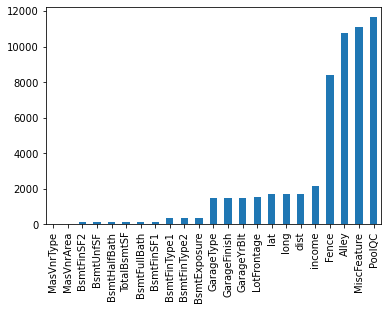

In [32]:
missing_values_table(housing)["Missing Values"].plot.bar()

In [33]:
housing=housing.drop(["MiscFeature"], axis=1)

In [34]:
housing[housing.columns[housing.isnull().any()]]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PoolQC,Fence,lat,long,dist,income
0,NaN,NaN,None,0.0,No,Rec,238.0,Unf,0.0,618.0,...,1939.0,Unf,2.0,399.0,NaN,NaN,42.018564,-93.651619,0.998896,NaN
1,42.0,NaN,BrkFace,149.0,Mn,GLQ,552.0,ALQ,393.0,104.0,...,1984.0,Fin,1.0,266.0,NaN,NaN,42.024855,-93.663671,1.433537,21333.0
2,60.0,NaN,None,0.0,No,ALQ,737.0,Unf,0.0,100.0,...,1930.0,Unf,1.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN
3,80.0,NaN,None,0.0,No,Unf,0.0,Unf,0.0,405.0,...,1940.0,Unf,1.0,281.0,NaN,NaN,42.037391,-93.612207,3.072689,52375.0
4,70.0,NaN,None,0.0,No,GLQ,643.0,Unf,0.0,167.0,...,2001.0,Fin,2.0,528.0,NaN,NaN,42.044554,-93.631818,2.326978,61991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,NaN,NaN,None,0.0,No,Unf,0.0,Unf,0.0,952.0,...,1916.0,Unf,1.0,192.0,NaN,NaN,42.032102,-93.626373,1.768156,37028.0
11662,NaN,NaN,None,0.0,NaN,NaN,0.0,NaN,0.0,0.0,...,1955.0,Unf,2.0,452.0,NaN,NaN,42.027669,-93.666138,1.626168,21333.0
11663,82.0,NaN,None,0.0,No,BLQ,284.0,Unf,0.0,717.0,...,1949.0,Unf,3.0,871.0,NaN,NaN,42.020129,-93.643832,0.763415,20878.0
11664,NaN,NaN,BrkFace,144.0,No,GLQ,841.0,Unf,0.0,144.0,...,2000.0,Fin,2.0,486.0,NaN,NaN,42.016802,-93.689748,3.739425,33311.0


In [35]:
#changing the NA values which aren't NAs to different values to work better with the data set
medl = housing.LotFrontage.median()
medm = housing.MasVnrArea.median()
housing.Alley = housing.Alley.fillna("No Alley Access")
housing.LotFrontage = housing.LotFrontage.fillna(medl)
housing.MasVnrArea = housing.MasVnrArea.fillna(medm)
housing.MasVnrType = housing.MasVnrType.fillna('None')
housing.BsmtQual = housing.BsmtQual.fillna("No Basement")

In [36]:

housing.PoolQC = housing.PoolQC.fillna(0)
housing.PoolQC=np.where(housing.PoolQC==0, 0,1)

In [37]:
# Fill the NA with the right values
housing.BsmtCond = housing.BsmtCond.fillna("No Basement")
housing.BsmtExposure = housing.BsmtExposure.fillna("No Basement")
housing.BsmtFinType1 = housing.BsmtFinType1.fillna("No Basement")
housing.BsmtFinType2 = housing.BsmtFinType2.fillna("No Basement")
housing.FireplaceQu = housing.FireplaceQu.fillna("No Fireplace")
housing.GarageType = housing.GarageType.fillna("No Garage")
housing.GarageFinish = housing.GarageFinish.fillna("No Garage")
housing.GarageQual = housing.GarageQual.fillna("No Garage")
housing.GarageCond = housing.GarageCond.fillna("No Garage")
housing.Fence = housing.Fence.fillna("No Fence")
housing.Electrical = housing.Electrical.fillna("None")


In [38]:
#imputing KNN for NAN

from fancyimpute  import KNN
# calling the KNN class
knn_imputer = KNN()
# imputing the missing value with knn imputer

housing[['LotFrontage','MasVnrArea',"BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea","long","lat","dist","income","BsmtFullBath","BsmtHalfBath","GarageCars","GarageYrBlt"]] = knn_imputer.fit_transform(housing[['LotFrontage','MasVnrArea',"BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea","long","lat","dist","income","BsmtFullBath","BsmtHalfBath","GarageCars","GarageYrBlt"]])



Imputing row 1/11666 with 1 missing, elapsed time: 15.602
Imputing row 101/11666 with 1 missing, elapsed time: 15.607
Imputing row 201/11666 with 0 missing, elapsed time: 15.610
Imputing row 301/11666 with 0 missing, elapsed time: 15.611
Imputing row 401/11666 with 0 missing, elapsed time: 15.611
Imputing row 501/11666 with 0 missing, elapsed time: 15.612
Imputing row 601/11666 with 0 missing, elapsed time: 15.612
Imputing row 701/11666 with 0 missing, elapsed time: 15.613
Imputing row 801/11666 with 0 missing, elapsed time: 15.613
Imputing row 901/11666 with 5 missing, elapsed time: 15.623
Imputing row 1001/11666 with 0 missing, elapsed time: 15.628
Imputing row 1101/11666 with 0 missing, elapsed time: 15.629
Imputing row 1201/11666 with 0 missing, elapsed time: 15.629
Imputing row 1301/11666 with 0 missing, elapsed time: 15.629
Imputing row 1401/11666 with 0 missing, elapsed time: 15.630
Imputing row 1501/11666 with 0 missing, elapsed time: 15.630
Imputing row 1601/11666 with 0 missi

In [39]:
missing_values_table(housing) # No more missing values

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_50075/2694707503.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return mis_val_table_ren_columns.sort_values(by= "Missing Values")[mis_val_table_ren_columns["Missing Values"]>10]


,Missing Values,% of Total Values


# Feature Engineering

In [40]:
housing.YearBuilt = 2010 - housing.YearBuilt
housing.GarageYrBlt = 2010 - housing.GarageYrBlt
housing.YrSold = 2010 -housing.YrSold 
housing.YearRemodAdd = 2010 -housing.YearRemodAdd

In [41]:
# Creation of new column combining full and half bathrooms into one
bathrm = (housing['FullBath'] + housing['BsmtFullBath'] +
(housing['HalfBath']*0.5) + (housing['BsmtHalfBath']*0.5))
housing['bathrm_cnt'] = bathrm

# Creation of new column combining deck/porch-related sq footage into one
patioSF = (housing['WoodDeckSF'] + housing['OpenPorchSF']+ housing['EnclosedPorch'] + 
           housing['3SsnPorch'] + housing['ScreenPorch'])
housing['patioSF'] = patioSF

In [42]:
#plt.hist(housing.SalePrice, bins = 50)


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


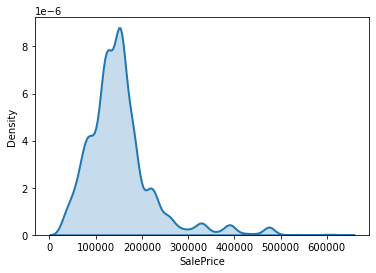

In [43]:
sns.distplot(housing.SalePrice, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2})
plt.show()

In [44]:
housing["SalePrice"].mean()

151939.00771472655

(array([2.01e+02, 0.00e+00, 2.00e+00, 0.00e+00, 1.01e+02, 0.00e+00,
        1.01e+02, 4.00e+00, 1.82e+02, 6.00e+00, 1.89e+02, 1.05e+02,
        1.04e+02, 2.90e+02, 3.20e+02, 2.28e+02, 5.30e+01, 5.09e+02,
        1.42e+02, 2.60e+02, 4.81e+02, 9.04e+02, 7.77e+02, 4.97e+02,
        6.20e+02, 1.72e+03, 4.77e+02, 6.49e+02, 5.84e+02, 3.33e+02,
        1.18e+02, 4.19e+02, 2.91e+02, 1.05e+02, 1.97e+02, 6.30e+01,
        5.00e+01, 4.80e+01, 1.45e+02, 4.40e+01, 2.00e+01, 1.39e+02,
        2.60e+01, 2.20e+01, 1.10e+01, 1.06e+02, 5.00e+00, 6.00e+00,
        1.00e+00, 1.10e+01]),
 array([10.46027076, 10.51797552, 10.57568027, 10.63338503, 10.69108978,
        10.74879454, 10.80649929, 10.86420405, 10.9219088 , 10.97961356,
        11.03731831, 11.09502307, 11.15272783, 11.21043258, 11.26813734,
        11.32584209, 11.38354685, 11.4412516 , 11.49895636, 11.55666111,
        11.61436587, 11.67207062, 11.72977538, 11.78748013, 11.84518489,
        11.90288964, 11.9605944 , 12.01829916, 12.07600391, 1

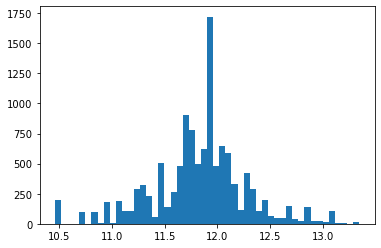

In [45]:
#use the log function to make the data normal
plt.hist(np.log(housing.SalePrice+1), bins = 50)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


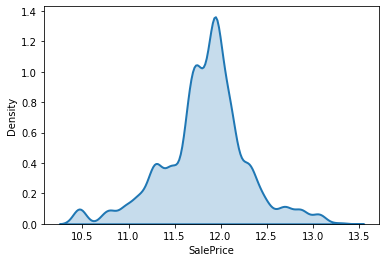

In [46]:
sns.distplot(np.log(housing.SalePrice+1), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2})
plt.show()

In [47]:
np.log(housing["SalePrice"]).mean()

11.8283470223983

In [48]:
housing.Alley =housing.Alley.apply(lambda x: 0 if x =="No Alley Acces" else 1 )
housing.LotShape =housing.LotShape.apply(lambda x: 1 if x =="Reg" else 0 )
housing.LandContour =housing.LandContour.apply(lambda x: 1 if x =="Lvl" else 0 )
housing.Utilities =housing.Utilities.apply(lambda x: 1 if x =="AllPub" else 0 )
housing.LandSlope =housing.LandSlope.apply(lambda x: 1 if x =="Gtl" else 0 )
housing.Condition1 =housing.Condition1.apply(lambda x: 1 if x =="Norm" else 0 )
housing.Condition2 =housing.Condition2.apply(lambda x: 1 if x =="Norm" else 0 )
housing.BldgType =housing.BldgType.apply(lambda x: 1 if x =="1Fam" else 0 )
housing.RoofStyle =housing.RoofStyle.apply(lambda x: 1 if x =="Gable" else 0 )
housing.RoofMatl =housing.RoofMatl.apply(lambda x: 1 if x =="CompShg" else 0 )
housing.BsmtFinType2 =housing.BsmtFinType2.apply(lambda x: 1 if x =="Unf" else 0 )

housing.Heating =housing.Heating.apply(lambda x: 1 if x =="GasA" else 0 )

housing.Electrical =housing.Electrical.apply(lambda x: 1 if x =="SBrkr" else 0 )

housing.Fence =housing.Fence.apply(lambda x: 0 if x =="No Fence" else 1 )
housing.BsmtExposure =housing.BsmtExposure.apply(lambda x: 0 if x =="No" else 1 )

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LotConfig


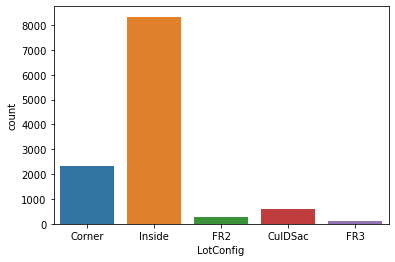

Neighborhood


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


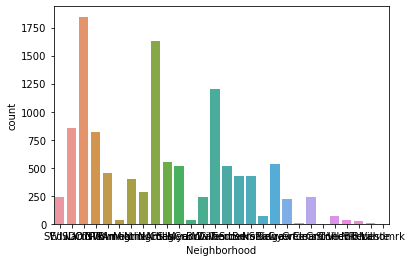

HouseStyle


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


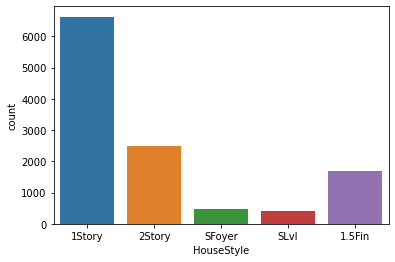

Exterior1st


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


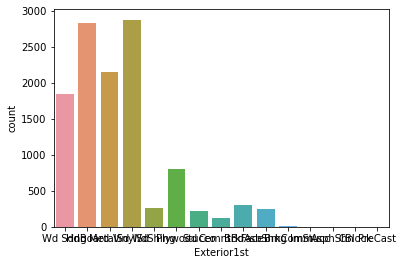

Exterior2nd


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


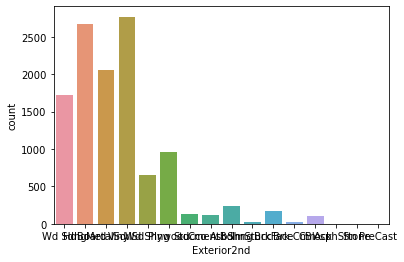

MasVnrType


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


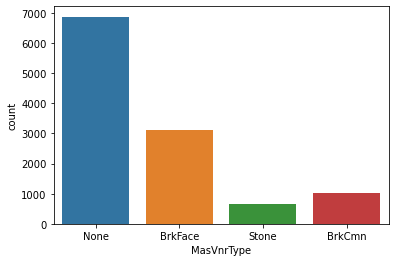

Foundation


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


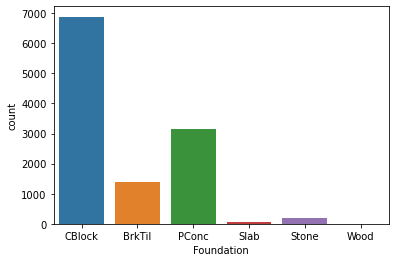

BsmtExposure


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


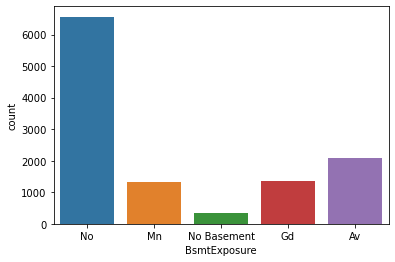

BsmtFinType1


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


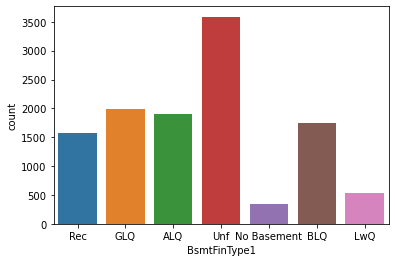

Functional


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


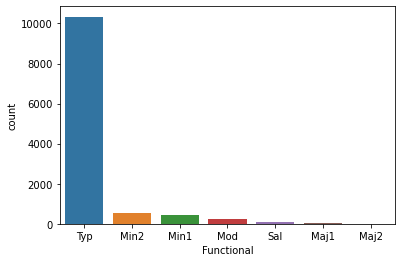

GarageType


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


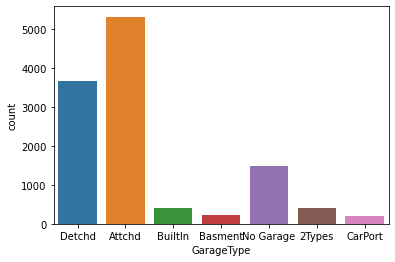

GarageFinish


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


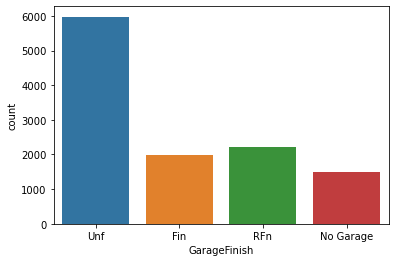

SaleCondition


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


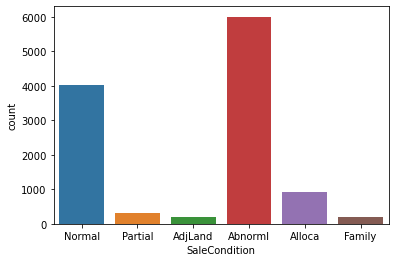

In [49]:
# Keep the numerical data to the left and categorical data to the right.
# Visualise the proportion of each categorical labels
categorical_data=[]
housing_new =pd.DataFrame()
#print(len(housing_new))
housing_new["SalePrice"]=housing["SalePrice"]
for ele in housing.columns:
    if np.dtype(housing[ele])== "int64" or np.dtype(housing[ele])=="float64":
        housing_new[ele] = housing[ele]
       #print(len(housing_new))
    else:
        print(ele)
        categorical_data.append(ele)
        sns.countplot(housing[ele])
    plt.show()


In [50]:
for name in categorical_data:
    print(name, ': number of values', len(housing[name].value_counts()))

LotConfig : number of values 5
Neighborhood : number of values 28
HouseStyle : number of values 5
Exterior1st : number of values 15
Exterior2nd : number of values 16
MasVnrType : number of values 4
Foundation : number of values 6
BsmtExposure : number of values 5
BsmtFinType1 : number of values 7
Functional : number of values 7
GarageType : number of values 7
GarageFinish : number of values 4
SaleCondition : number of values 6


In [51]:
housing_new[categorical_data] = housing[categorical_data]

In [52]:
# Get the dummies of each categorical Data.
for ele in categorical_data:
    # Converting type of columns to category
    housing_new=pd.get_dummies(housing_new, prefix="{}_".format(ele), 
                            columns=[ele], 
                            drop_first=True)
    

housing_new#=housing_new.drop(["repeat","repeat_x", "repeat_y"], axis=1)

,SalePrice,repeat1,repeat,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,...,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,126000,0,0,909176150,856,30,1,70.0,7890,1,...,1,0,0,0,1,0,0,0,1,0
1,139500,1,1,905476230,1049,120,1,42.0,4235,1,...,0,0,0,0,0,0,0,0,1,0
2,124900,2,2,911128020,1001,30,0,60.0,6060,1,...,1,0,0,0,1,0,0,0,1,0
3,114000,3,3,535377150,1039,70,1,80.0,8146,1,...,1,0,0,0,1,0,0,0,1,0
4,227000,4,4,534177230,1665,60,1,70.0,8400,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,121000,4361,2571,903205040,952,30,1,70.0,8854,1,...,1,0,0,0,1,0,0,0,1,0
11662,139600,4362,2572,905402060,1733,20,1,70.0,13680,1,...,0,0,0,0,1,0,0,0,1,0
11663,145000,4363,2573,909275030,2002,90,0,82.0,6270,1,...,0,0,0,0,1,0,0,0,1,0
11664,217500,4364,2574,907192040,1842,60,1,70.0,8826,1,...,0,0,0,0,0,0,0,0,1,0


**Fitting and Evaluating Multiple Linear Regression**


In [54]:
from sklearn.model_selection import train_test_split
from itertools import combinations
# Get all combinations of according to the best contributions in increasing the R^2
# The process creates a partail ording among the predictors where A rel B if A is Subset of B and R2A <=R2B
fnlst =[]
cv_score =[]
for ele in range(1,len(housing_new.columns)):
    
    comb = combinations(housing_new.iloc[:,1:].columns.difference(fnlst), 1)

    lst=[]
    scores=[]
    # Print the obtained combinations
    for i in list(comb):
        ols = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(housing_new[fnlst+list(i)], housing_new.iloc[:,0], test_size=0.5, random_state=0)
        #lst.append(list(i))
        ols.fit(X_train, y_train)
        lst.append(list(i))
        scores.append(ols.score(X_train, y_train))
    cv_score.append(pd.Series(scores).max())
    fnlst =fnlst+lst[pd.Series(scores)[pd.Series(scores)==pd.Series(scores).max()].index[0]]





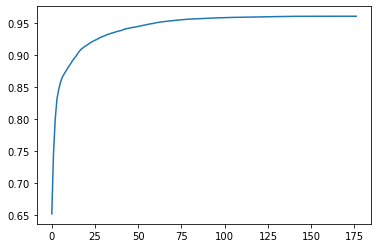

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(cv_score)), cv_score)

In [56]:

pca = PCA(n_components = 3)

principal_components_ = pca.fit_transform(housing_new[fnlst[50:100]])
total_var = sum(pca.explained_variance_ratio_)*100
print("Explained ratio is ", sum(pca.explained_variance_ratio_))
print("Explained ratio of 1st is ", (pca.explained_variance_ratio_[0]))

housing_new["PCA_1"] =   list(principal_components_[:,0])/max(list(principal_components_[:,0]))
housing_new["PCA_1"]

Explained ratio is  0.9910454943746543
Explained ratio of 1st is  0.7746023408297841


0       -0.042125
1       -0.167790
2       -0.195276
3       -0.154720
4        0.085004
           ...   
11661   -0.241288
11662    0.009720
11663    0.408451
11664    0.071516
11665    0.055158
Name: PCA_1, Length: 11666, dtype: float64


ols = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(housing_new[fnlst[:60]], housing_new.iloc[:,0], test_size=0.5, random_state=0)

ols.fit(X_train, y_train)
print(ols.score(X_test, y_test))


In [84]:


from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(housing_new[fnlst[:60]], housing_new.iloc[:,0], test_size=0.5, random_state=0)
lst.append(ele)
ols.fit(X_train, y_train)
print('-'*50)
print(ols.score(X_train, y_train))
print(ols.score(X_test, y_test))
print('-'*50)


--------------------------------------------------
0.9496711536634211
0.9400985990385824
--------------------------------------------------
